<a href="https://colab.research.google.com/github/DeepakReddyVelagala/DartBase/blob/main/Hugging_face_shots/zero_shot_classification_w_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from transformers.utils import logging
logging.set_verbosity_error()

In [11]:
from transformers import CLIPModel, CLIPProcessor

In [12]:
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [13]:
from PIL import Image

In [52]:
image = Image.open("/content/13-12-47.553694.jpg")

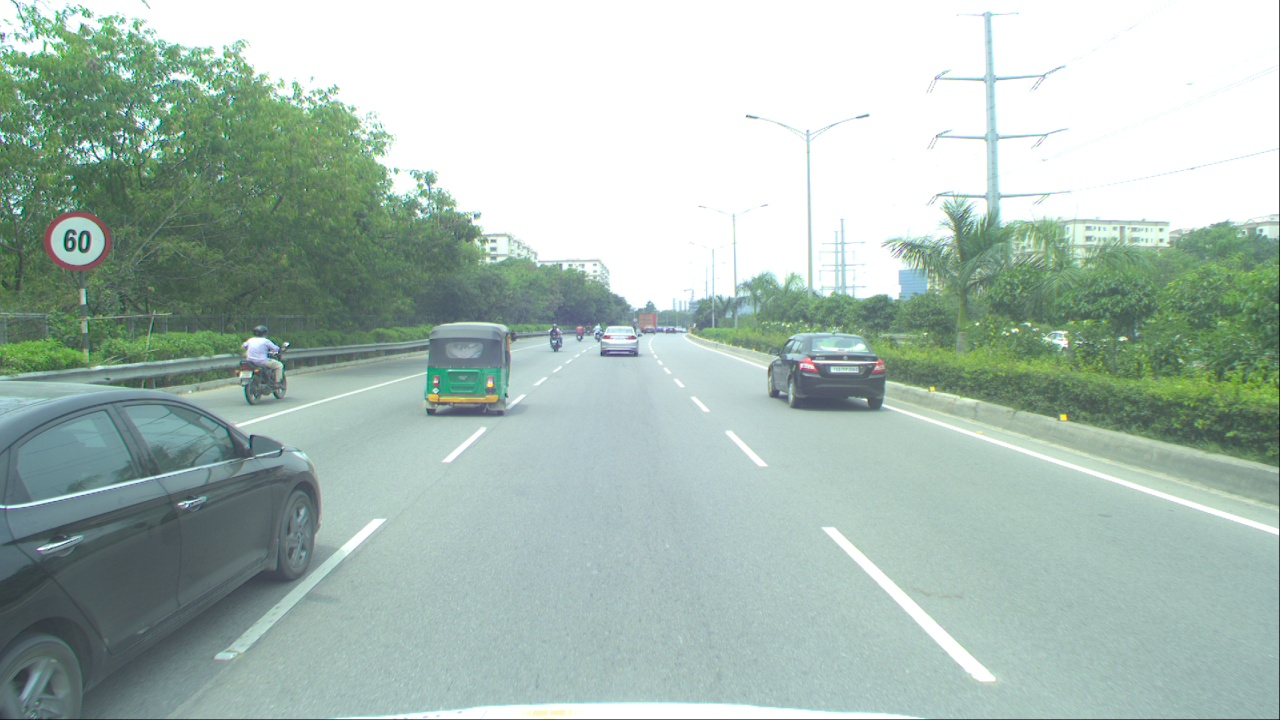

In [53]:
image

In [54]:
labels = ['animals', 'potholes', 'speed breaker', 'clear road']

In [55]:
inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

In [56]:
outputs = model(**inputs)

In [57]:
logits = outputs.logits_per_image

In [58]:
probs = logits.softmax(dim=1)[0]

In [59]:
probs

tensor([7.6642e-05, 1.0794e-03, 7.9286e-02, 9.1956e-01],
       grad_fn=<SelectBackward0>)

In [60]:
probs = list(probs)
for i in range(len(labels)):
  print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: animals - probability of 0.0001
label: potholes - probability of 0.0011
label: speed breaker - probability of 0.0793
label: clear road - probability of 0.9196
